This notebook is used to get the confusion matrix in the patient-level.

In [17]:
import openpyxl
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [18]:
labels = ['MSS','MSI']
info = openpyxl.load_workbook('D:/dataset_Huo_1/results/efficientnet_result_patient_0816.xlsx')
# info = openpyxl.load_workbook('D:/dataset_Huo_1/MSS.xlsx')
sheet = info['method1']

In [19]:
true_label = []
#MSIMUT
for i in range(26):
    true_label.append(1)
#MSS
for j in range(74):
    true_label.append(0)

pred_label = []
for i in range(26):
    if sheet["B%d" % (i+1)].value < 0.5:
        pred_label.append(0)
    if sheet["B%d" % (i+1)].value >= 0.5:
        pred_label.append(1)

for j in range(74):
    if sheet["D%d" % (j+1)].value < 0.5:
        pred_label.append(0)
    if sheet["D%d" % (j+1)].value >= 0.5:
        pred_label.append(1)
print(pred_label)
# pred_label = []
# for i in range(26):
#     pred_label.append(sheet["B%d" % (i+1)].value)
# for j in range(74):
#     pred_label.append(sheet["D%d" % (j+1)].value)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[[56 18]
 [ 7 19]]
[[0.76 0.24]
 [0.27 0.73]]


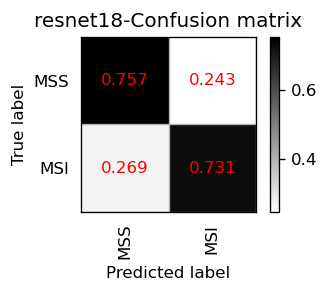

In [20]:
tick_marks = np.array(range(len(labels))) + 0.5
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap = plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(true_label, pred_label)
print(cm)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)
plt.figure(figsize=(3,2), dpi=120)
#set the fontsize of label.
# for label in plt.gca().xaxis.get_ticklabels():
#    label.set_fontsize(24)
# text portion
ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)
 
for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if (c > 0.01):
	    plt.text(x_val, y_val, "%0.3f" %(c,), color='red', fontsize=10, va='center', ha='center')
#offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)
 
plot_confusion_matrix(cm_normalized, title='resnext101-Confusion matrix')
#show confusion matrix
plt.show()